Shift Samples: -5
Lag: -20
Estimated Distance: 1600.0 meters


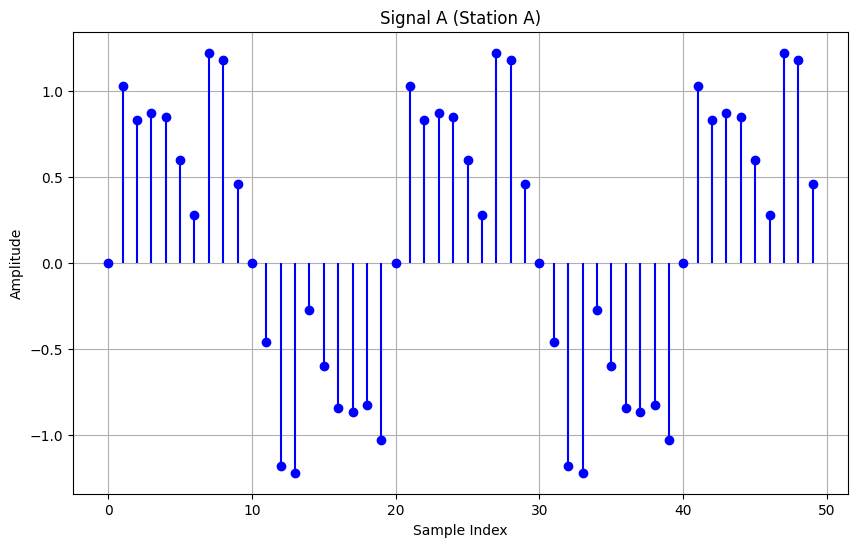

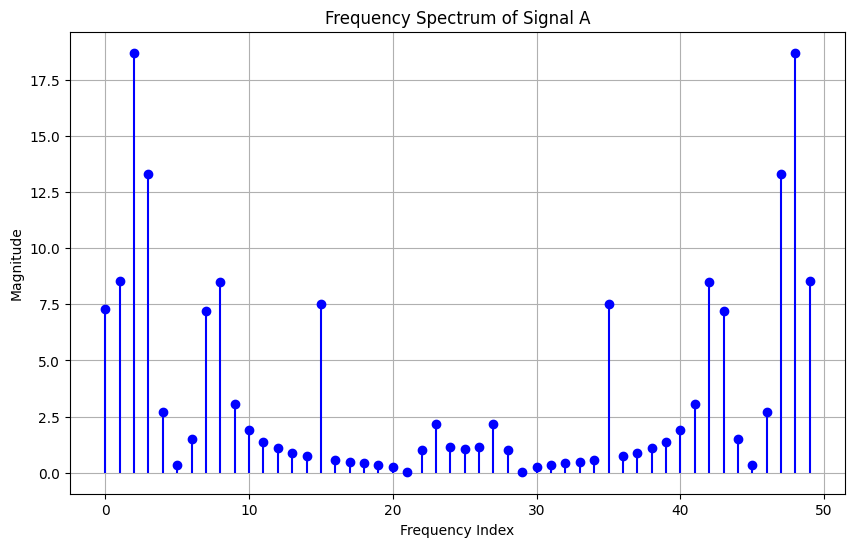

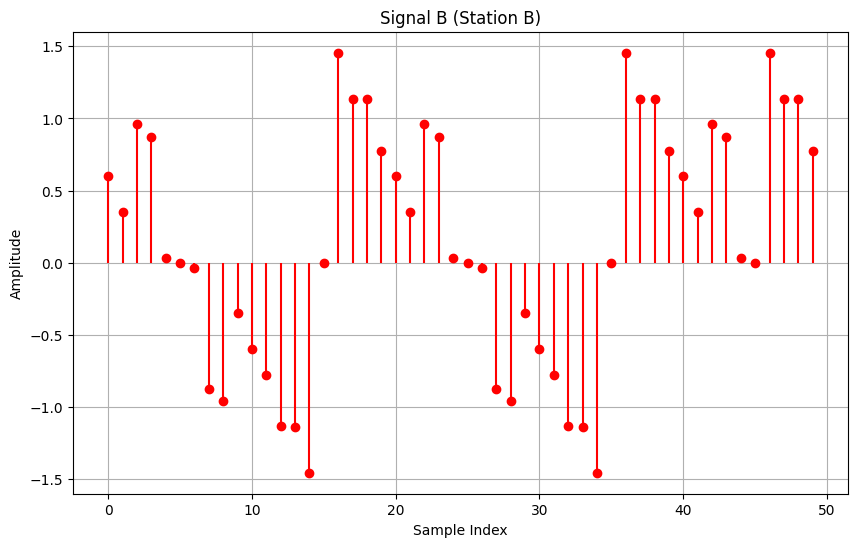

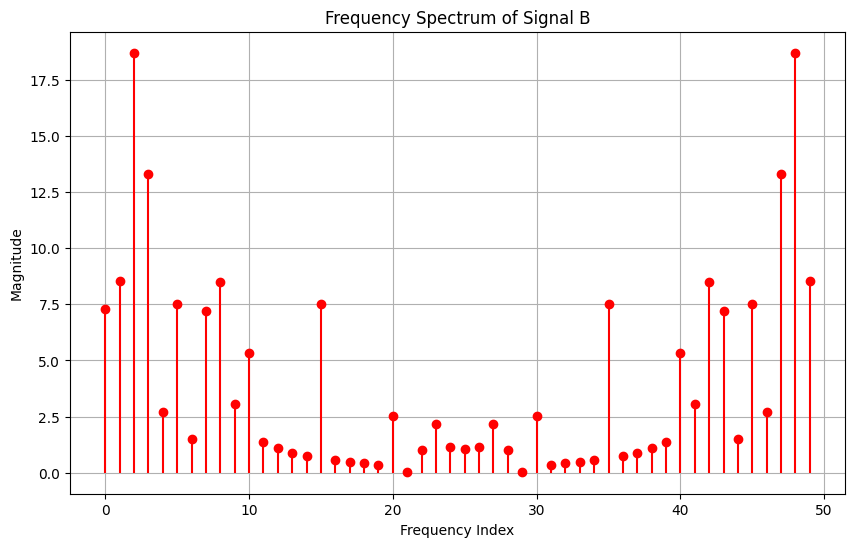

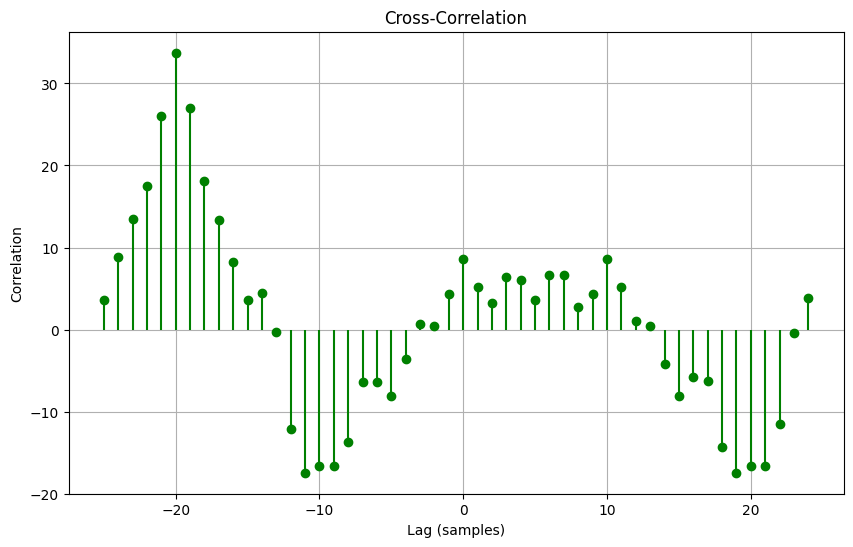

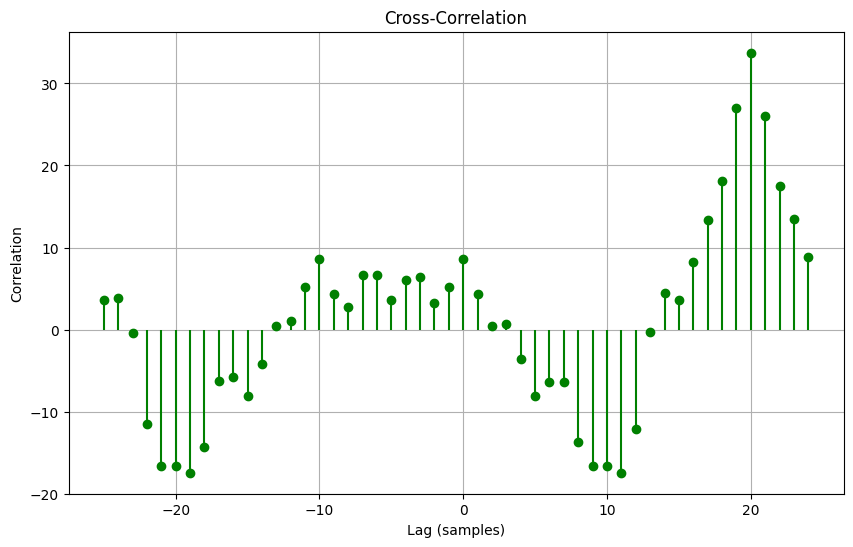

In [6]:
import numpy as np
import matplotlib.pyplot as plt
n=50
samples = np.arange(n) 
sampling_rate=100
wave_velocity=8000



#use this function to generate signal_A and signal_B with a random shift
def generate_signals(frequency=5):

    noise_freqs = [15, 30, 45]  # Default noise frequencies in Hz

    amplitudes = [0.5, 0.3, 0.1]  # Default noise amplitudes
    noise_freqs2 = [10, 20, 40] 
    amplitudes2 = [0.3, 0.2, 0.1]
    
     # Discrete sample indices
    dt = 1 / sampling_rate  # Sampling interval in seconds
    time = samples * dt  # Time points corresponding to each sample

    # Original clean signal (sinusoidal)
    original_signal = np.sin(2 * np.pi * frequency * time)

    # Adding noise
    noise_for_sigal_A = sum(amplitude * np.sin(2 * np.pi * noise_freq * time)
                for noise_freq, amplitude in zip(noise_freqs, amplitudes))
    noise_for_sigal_B = sum(amplitude * np.sin(2 * np.pi * noise_freq * time)
                for noise_freq, amplitude in zip(noise_freqs2, amplitudes2))
    signal_A = original_signal + noise_for_sigal_A 
    noisy_signal_B = signal_A + noise_for_sigal_B

    # Applying random shift
    #shift_samples = 3
    shift_samples = np.random.randint(-n // 2, n // 2)  # Random shift
    print(f"Shift Samples: {shift_samples}")
    signal_B = np.roll(noisy_signal_B, shift_samples)
    
    return signal_A, signal_B

#implement other functions and logic


def DFT(signal):
    N=len(signal)
    dft=[]
    for k in range(N):
        dft_sum=sum(signal[n]*np.exp(-2j*np.pi*k*n/N)for n in range(N))
        dft.append(dft_sum)
    return np.array(dft)


def IDFT(signal):
    N=len(signal)
    idft=[]
    for n in range(N):
        idft_sum=sum(signal[k]*np.exp(2j*np.pi*k*n/N) for k in range(N))
        idft.append(idft_sum/N)
    return np.array(idft)


def cross_correlation(signal_A, signal_B):
    DFT_A=DFT(signal_A)
    DFT_B=DFT(signal_B)
    conj_DFT_B=np.conjugate(DFT_B)
    
    cross_corr_freq=DFT_A*conj_DFT_B
    cross_corr_time=IDFT(cross_corr_freq)
    return np.real(cross_corr_time)


def cross_correlation2(signal_A,signal_B):
    DFT_A=DFT(signal_A)
    DFT_B=DFT(signal_B)
    conj_DFT_A=np.conjugate(DFT_A)
    
    cross_corr_freq=DFT_B*conj_DFT_A
    cross_corr_time=IDFT(cross_corr_freq)
    return np.real(cross_corr_time)


def sample_lag(signal_A, signal_B):
    cross_corr=cross_correlation(signal_A, signal_B)
    return np.argmax(cross_corr)-n//2

def calc_distance(signal_A, signal_B):
    lag = sample_lag(signal_A, signal_B)  
    distance = abs(lag) * (1 / sampling_rate) * wave_velocity
    return distance


signal_A, signal_B=generate_signals()

cross_corr=cross_correlation(signal_A, signal_B)

lag=sample_lag(signal_A,signal_B)

print(f"Lag: {lag}")

distance=calc_distance(signal_A, signal_B)

print(f"Estimated Distance: {distance} meters")


# Plot Signal A
plt.figure(figsize=(10, 6))
plt.stem(samples, signal_A, linefmt="b-", markerfmt="bo", basefmt=" ")
plt.title("Signal A (Station A)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Plot Spectrum of Signal A
plt.figure(figsize=(10, 6))
signal_A_dft = DFT(signal_A)  
plt.stem(np.abs(signal_A_dft), linefmt="b-", markerfmt="bo", basefmt=" ")  # Plot magnitude of DFT
plt.title("Frequency Spectrum of Signal A")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# Plot Signal B
plt.figure(figsize=(10, 6))
plt.stem(samples, signal_B, linefmt="r-", markerfmt="ro", basefmt=" ")
plt.title("Signal B (Station B)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Plot Spectrum of Signal B
plt.figure(figsize=(10, 6))
signal_B_dft = DFT(signal_B)  
plt.stem(np.abs(signal_B_dft), linefmt="r-", markerfmt="ro", basefmt=" ")  # Plot magnitude of DFT
plt.title("Frequency Spectrum of Signal B")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.stem(np.arange(-n // 2, n // 2), cross_corr, linefmt="g-", markerfmt="go", basefmt=" ")
plt.title("Cross-Correlation")
plt.xlabel("Lag (samples)")
plt.ylabel("Correlation")
plt.grid()
plt.show()



cross_corr2=cross_correlation2(signal_A,signal_B)
# Plot cross-correlation2
plt.figure(figsize=(10, 6))
plt.stem(np.arange(-n // 2, n // 2), cross_corr2, linefmt="g-", markerfmt="go", basefmt=" ")
plt.title("Cross-Correlation")
plt.xlabel("Lag (samples)")
plt.ylabel("Correlation")
plt.grid()
plt.show()

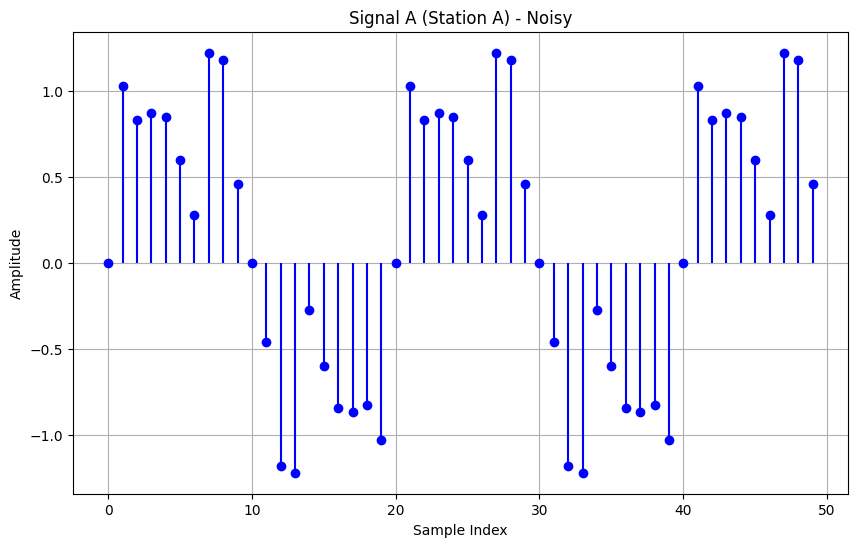

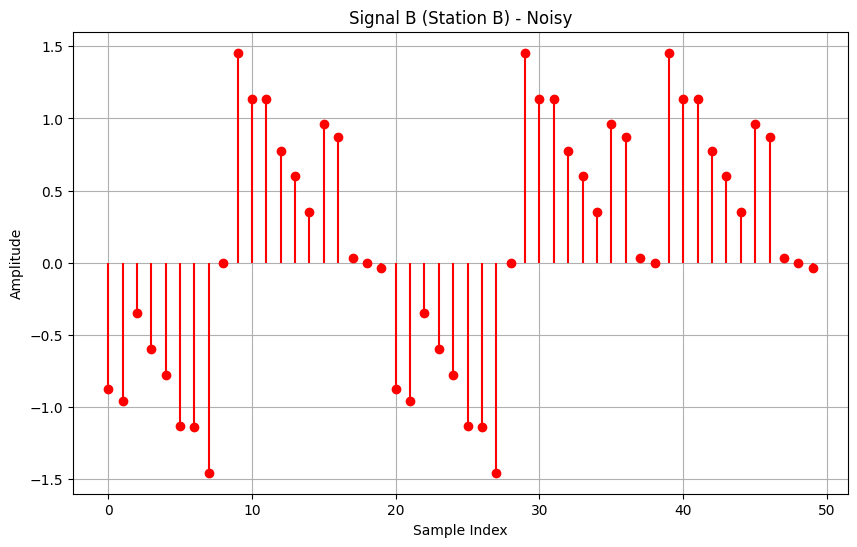

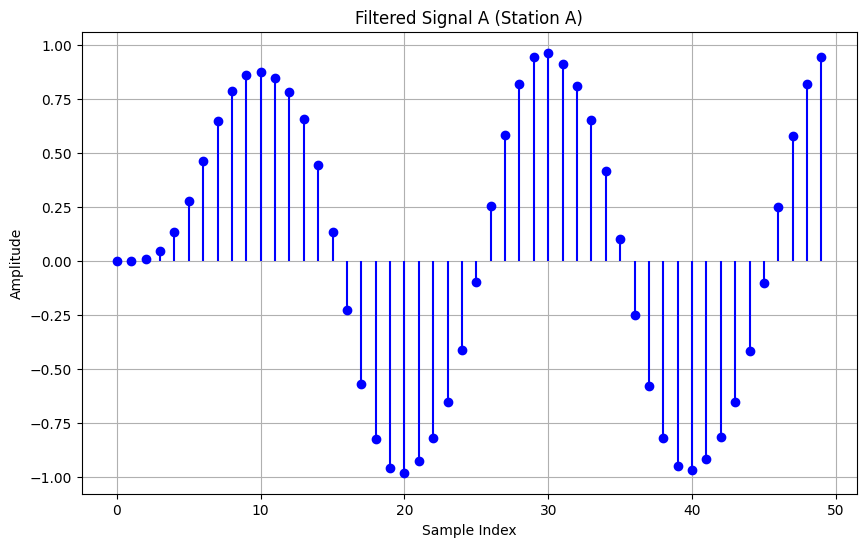

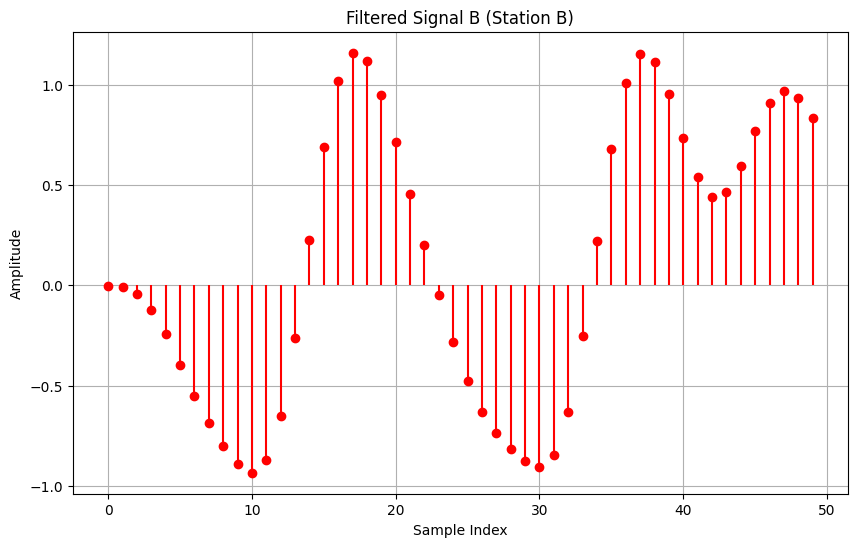

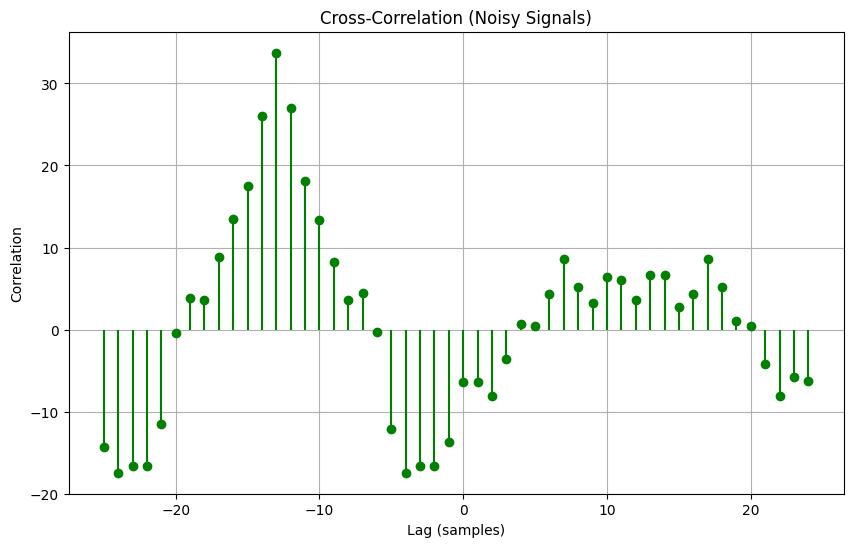

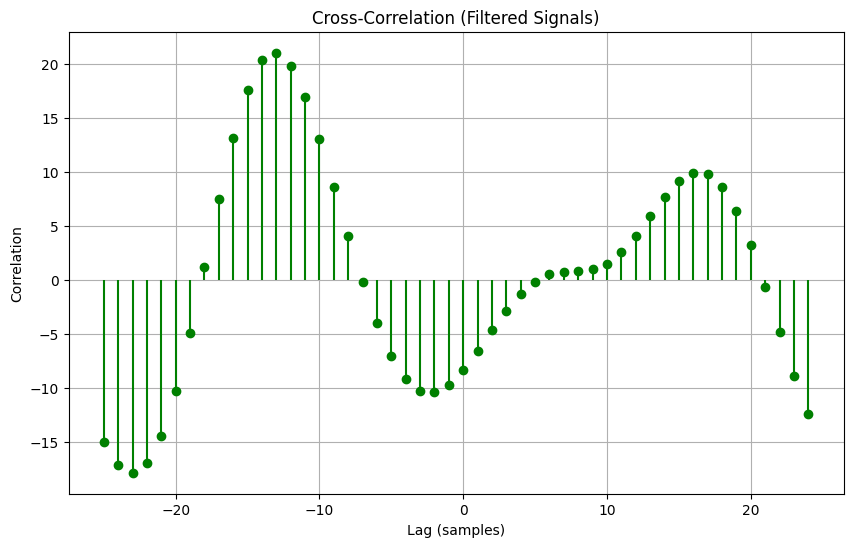

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
import time



def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order)
    return lfilter(b, a, data)


def experiment():
    
    signal_A, signal_B = generate_signals()

   
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(signal_A)), signal_A, linefmt="b-", markerfmt="bo", basefmt=" ")
    plt.title("Signal A (Station A) - Noisy")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(signal_B)), signal_B, linefmt="r-", markerfmt="ro", basefmt=" ")
    plt.title("Signal B (Station B) - Noisy")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

   
    cutoff_frequency = 10  # 10 Hz
    fs = 100  # Sampling rate
    filtered_signal_A = lowpass_filter(signal_A, cutoff_frequency, fs)
    filtered_signal_B = lowpass_filter(signal_B, cutoff_frequency, fs)

   
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(filtered_signal_A)), filtered_signal_A, linefmt="b-", markerfmt="bo", basefmt=" ")
    plt.title("Filtered Signal A (Station A)")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(filtered_signal_B)), filtered_signal_B, linefmt="r-", markerfmt="ro", basefmt=" ")
    plt.title("Filtered Signal B (Station B)")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

 
    cross_corr_noisy = cross_correlation(signal_A, signal_B)

    
    cross_corr_filtered = cross_correlation(filtered_signal_A, filtered_signal_B)

    
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(-len(signal_A) // 2, len(signal_A) // 2), cross_corr_noisy, linefmt="g-", markerfmt="go", basefmt=" ")
    plt.title("Cross-Correlation (Noisy Signals)")
    plt.xlabel("Lag (samples)")
    plt.ylabel("Correlation")
    plt.grid()
    plt.show()


    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(-len(filtered_signal_A) // 2, len(filtered_signal_A) // 2), cross_corr_filtered, linefmt="g-", markerfmt="go", basefmt=" ")
    plt.title("Cross-Correlation (Filtered Signals)")
    plt.xlabel("Lag (samples)")
    plt.ylabel("Correlation")
    plt.grid()
    plt.show()

# Run the experiment
experiment()
